## SBU - MAR 570 - Fall 2019 - Profs. S.Hameed & R.Wilson
### Gui Larangeira - PCA Decomposition for NYISO electric loads and renewable resources

In [157]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import os
import numpy as np
from scipy.linalg import inv, solve, det, norm
from numpy import linalg
#from scipy import stats as st
import statistics as st
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [31]:
os.chdir("C:/Users/Glarange/Google Drive/Stony/MAR_570/project_data/Load/")
%pwd

'C:\\Users\\Glarange\\Google Drive\\Stony\\MAR_570\\project_data\\Load'

### 1. Import and visualize the data

In [32]:
# Import the Data as a Pandas data frame (Loads in KWh)
df = pd.read_csv("C:/Users/Glarange/Google Drive/Stony/MAR_570/project_data/Load/NYISO_Load_200812_full.csv", index_col=0)
loadzones = df.columns.values
index = df.index.values
df

,WEST(A),GENES(B),CENTRAL(C),NORTH(D),MHK_VL(E),CAPITAL(F),HUD_VL(G),MILLWOOD(H),DUNWOOD(I),NYC(J),LONGIL(K)
Date,,,,,,,,,,,
Jan-08,1419.1,887.5,1519.1,609.9,738.5,1020.6,921.1,266.2,478.6,4427.0,1843.7
Feb-08,1338.9,827.0,1431.1,574.5,686.5,950.0,854.4,257.1,451.6,4128.5,1697.2
Mar-08,1357.2,841.3,1449.5,597.4,662.6,966.3,857.5,236.0,472.9,4246.6,1709.1
Apr-08,1221.0,751.5,1290.8,527.7,557.2,852.6,784.2,191.3,435.4,4021.7,1555.3
May-08,1215.1,759.4,1293.1,534.0,598.2,880.0,780.0,200.7,445.9,4158.8,1638.9
Jun-08,1320.0,870.7,1410.7,524.7,660.9,1034.9,954.0,254.2,572.3,5218.4,2152.1
Jul-08,1431.1,946.9,1510.9,553.4,730.0,1122.6,1109.9,288.3,668.5,5886.0,2533.1
Aug-08,1357.5,882.3,1409.5,548.6,670.1,1013.5,958.4,262.1,552.1,5248.4,2230.9
Sep-08,1270.6,811.9,1308.5,526.8,616.0,967.2,856.4,241.7,507.7,4782.7,1932.6


In [34]:
# Pull the values from the data-frame, end up with the numpy matrix
X = df.values
load_names = df.columns.values

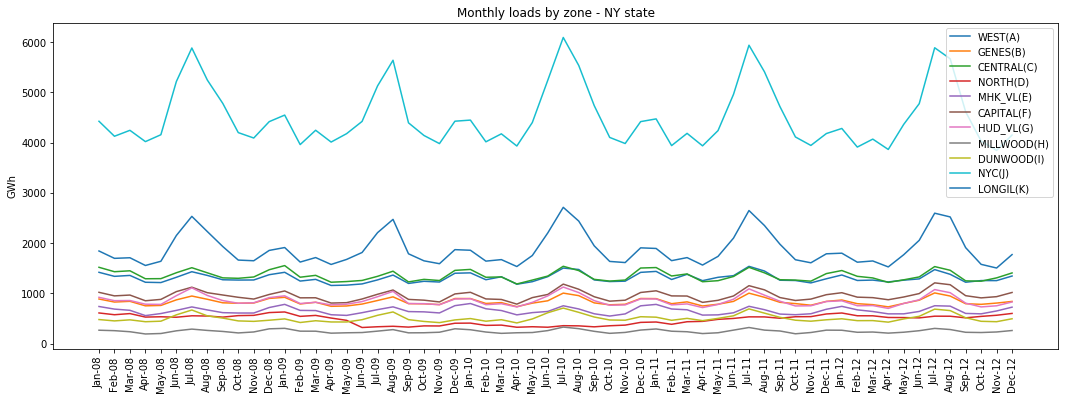

In [35]:
plt.figure(figsize=(18,6))
plt.plot(df, label = df.columns.values)
#plt.plot(X)
plt.title('Monthly loads by zone - NY state')
plt.ylabel('GWh')
plt.xticks(rotation=90)
plt.legend(['WEST(A)', 'GENES(B)', 'CENTRAL(C)', 'NORTH(D)', 'MHK_VL(E)',    
    'CAPITAL(F)', 'HUD_VL(G)', 'MILLWOOD(H)', 'DUNWOOD(I)', 'NYC(J)','LONGIL(K)']);
plt.show()

### 2. Calculate the COVARIANCE matrix
Consider the covariance between observations at the two stations in A.1

%Form a data matrix [X] [31x6] where rows are time and columns are obs
X=[Ithicaprecip,IthicamaxT,IthicaminT,Cananprecip,CananmaxT,CananminT];

%Must demean [X] according to 10.4
   Xdm  =    X   -  ones(31) * X/31; %10.29
%[31x6] =  [6x31]  [31x31]   [31x6] 

 %Compute covariance matrix [S] according to 10.30
   S  =    Xdm' *  Xdm/(31-1);
%[6x6]=   [6x31]  [31x6]


In [36]:
# Calculate the covariance matrix
n = X.shape[0]                  # number of rows
ones = np.ones((n,n))
# X_dm = X - ones @ X/n           # demean the matrix, only Python 3.6
X_dm = X - np.dot(ones,X/n)
#S = X_dm.transpose() @ X_dm/(n-1)  
S = np.dot(X_dm.transpose(), X_dm/(n-1))

### 3. Calculate the eigenvectors and eigenvalues of the covariance matrix

Rescaling the data **did not alter the eigenvectors**, just the eigenvalues. The eigenvectors from the **covariance matrix**:

In [162]:
e_S = linalg.eig(S)
e = e_S[0]         # the eigenvalues
E = e_S[1]         # the eigenvectors

#print("Using the Covariance matrix:\n","\n" "EigenVectors\n",E, "\n","\nEigenvalues\n", e)

idx = 0 
dfE = pd.DataFrame(E)
dfe = pd.DataFrame(e).transpose()
dfE = dfE.append(dfe)
#dfE.insert(loc=idx, column='Sample Var.', value=var)
new_col = pd.DataFrame(var)  # can be a list, a Series, an array or a scalar   
dfE

,0,1,2,3,4,5,6,7,8,9,10
0,0.091127,0.383357,0.209187,-0.392682,0.705474,-0.014040,-0.239307,0.277031,-0.063175,0.103337,-0.014157
1,0.084985,0.224352,0.121313,-0.004046,0.036877,-0.077931,-0.154187,-0.348907,0.064662,-0.750272,0.455716
2,0.089826,0.543397,0.196595,-0.277577,-0.246665,-0.041829,0.405002,-0.322251,0.406105,0.145753,-0.253615
3,-0.007333,0.423366,-0.890753,0.015809,0.016914,-0.076500,-0.076919,-0.008140,-0.082880,-0.044390,-0.077826
4,0.048508,0.353983,0.271678,0.280926,-0.341239,0.139351,-0.520122,0.060748,-0.298947,-0.102707,-0.457840
5,0.116519,0.318068,0.031307,0.451627,0.025750,0.602359,0.180249,0.252774,0.143468,0.160769,0.417126
6,0.137973,0.167613,0.079647,-0.271113,-0.405426,-0.265462,0.306111,0.500182,-0.457644,-0.076488,0.281086
7,0.035411,0.126228,0.067144,0.064404,-0.049596,-0.219367,-0.226868,-0.495988,-0.327398,0.580638,0.426345
8,0.102476,0.003599,0.037997,0.156426,0.329553,0.189161,0.515708,-0.323441,-0.598614,-0.150561,-0.260018
9,0.854633,-0.236017,-0.135521,-0.273708,-0.107635,0.272213,-0.154254,-0.094696,0.016029,0.030061,-0.031753


In [41]:
#Plot the eigenvector matrix
#plt.figure(figsize=(8,6))
#plt.pcolor(e)
#plt.title('Eigenvector matrix for the 10 load zones')
#plt.colorbar()

#### The correlation matrix is:

0.04994480771649377

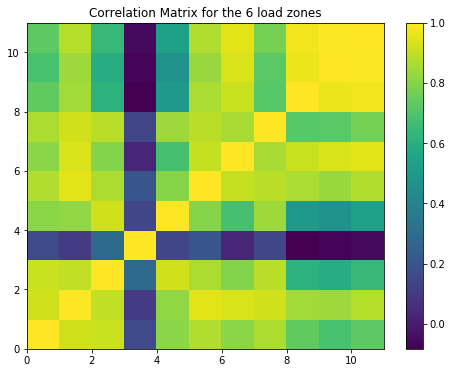

In [160]:
k = S.shape[0]
D = np.zeros((k,k))

for k in range(k):
    D[k,k] = np.sqrt(S[k,k])
#R = linalg.inv(D) @ S @ linalg.inv(D)
R = np.dot(np.dot(linalg.inv(D), S), linalg.inv(D))
plt.figure(figsize=(8,6))
plt.pcolor(R)
plt.title('Correlation Matrix for the 6 load zones')
plt.colorbar()
st.variance(R[0,:])

#### 3.1 Calculate the eigenvectors using the correlation matrix

In [163]:
e_Rr = linalg.eig(R)
e_R = e_Rr[0]         # the eigenvalues
E_R = e_Rr[1]         # the eigenvectors
idx = 0 
idx = 0 
dfER = pd.DataFrame(E_R)
dfeR = pd.DataFrame(e_R).transpose()
dfER = dfER.append(dfeR)
#dfE.insert(loc=idx, column='Sample Var.', value=var)   
dfER

,0,1,2,3,4,5,6,7,8,9,10
0,-0.315499,-0.165286,0.144351,-0.799234,0.154224,-0.107971,0.090553,-0.136495,0.313952,-0.158838,-0.165711
1,-0.340886,-0.032171,0.051833,-0.074901,0.042664,0.047659,-0.107918,0.038729,-0.432630,-0.490231,0.655540
2,-0.307274,-0.326433,0.186700,-0.103825,-0.034776,0.477817,-0.104353,0.483817,-0.158915,0.503553,-0.008973
3,-0.037037,-0.635136,-0.747883,0.042798,0.000863,-0.008147,-0.009369,-0.043917,-0.061159,-0.121547,-0.116074
4,-0.277993,-0.330460,0.443708,0.352782,-0.426015,-0.031276,-0.037477,-0.131030,-0.001316,-0.364749,-0.397618
5,-0.334754,-0.063745,-0.081717,0.117110,-0.428024,-0.377662,0.104093,-0.066929,0.416573,0.363290,0.465642
6,-0.332138,0.136753,-0.091672,0.189829,0.179230,0.573585,0.259441,-0.613800,0.099374,0.102632,0.030877
7,-0.320185,-0.134736,0.145539,0.329531,0.709215,-0.445933,-0.087882,-0.007599,-0.056121,0.173294,-0.082167
8,-0.307418,0.321437,-0.200595,-0.198198,-0.270571,-0.252991,-0.121856,-0.225556,-0.591749,0.274920,-0.306540
9,-0.303836,0.344647,-0.257276,0.090778,0.010172,0.146833,-0.677479,0.185906,0.383931,-0.186681,-0.130445


### 4. Fractional Variation

The total variance is the sum of the diagonal elements of the covariance matrix C, i.e., its trace. The fraction is defined as:

$$ \frac{\sum_{i} C_{ii}}  {\sum_{i=1}^{n} C_{i,i}}$$

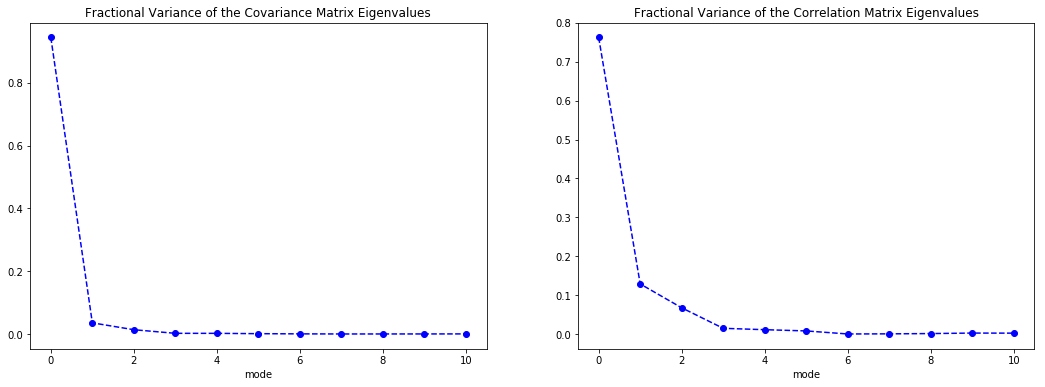

In [41]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(d/np.sum(d),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Fractional Variance of the Covariance Matrix Eigenvalues')
e/np.sum(e)

plt.subplot(1, 2, 2)
plt.plot(e_R/np.sum(e_R),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.title('Fractional Variance of the Correlation Matrix Eigenvalues')
plt.show()

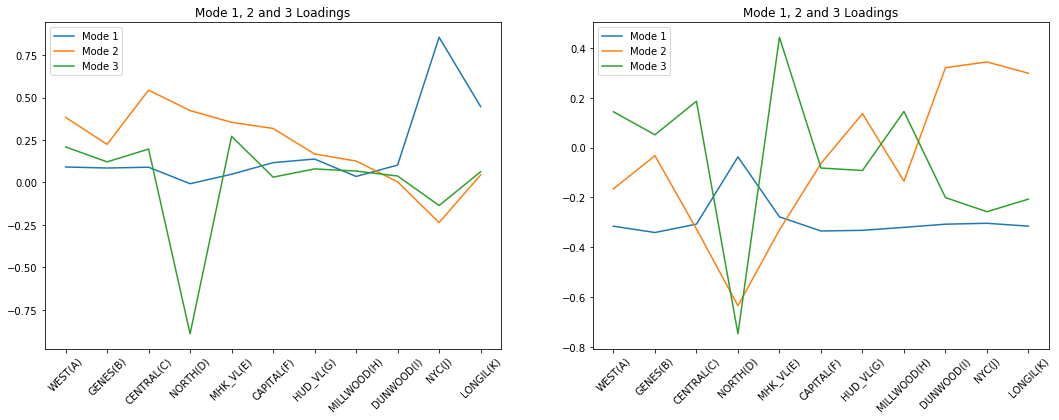

In [43]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(load_names,E[:,0], label = 'Mode 1')
plt.plot(E[:,1], label = 'Mode 2')
plt.plot(E[:,2], label = 'Mode 3')
plt.title('Mode 1, 2 and 3 Loadings')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(load_names,E_R[:,0], label = 'Mode 1')
plt.plot(E_R[:,1], label = 'Mode 2')
plt.plot(E_R[:,2], label = 'Mode 3')
plt.title('Mode 1, 2 and 3 Loadings')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 5. Plotting the principal components

The *new* coordinates $\mathbf{u}=[E]^T\mathbf{x'}$ 

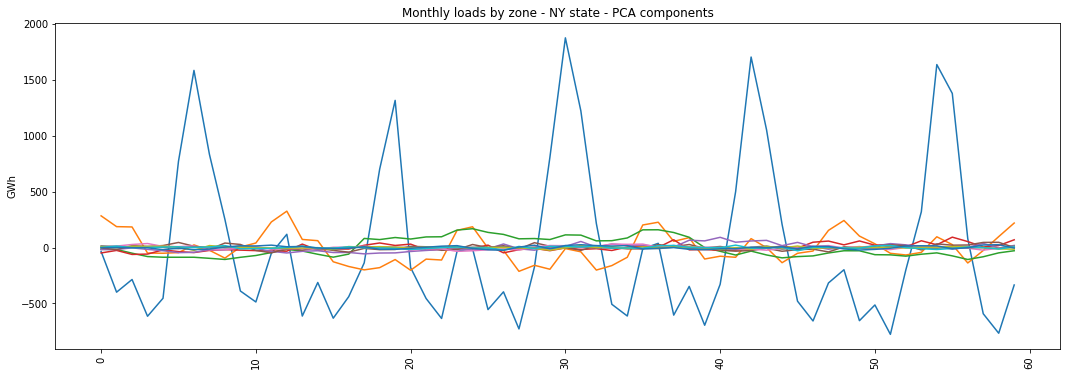

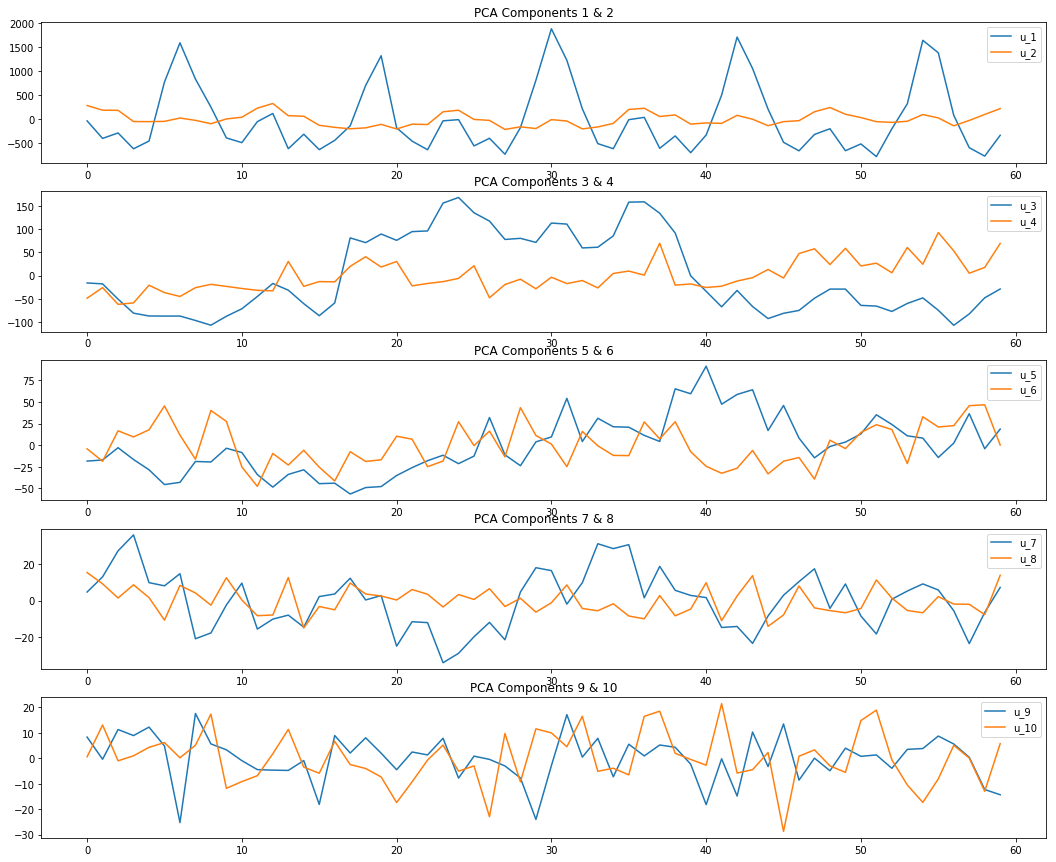

In [90]:
u = (E.transpose()@X_dm.transpose()).transpose()
plt.figure(figsize=(18,6))

plt.title('Monthly loads by zone - NY state - PCA components')
plt.ylabel('GWh')
plt.xticks(rotation=90)

plt.plot(u)
plt.show()

plt.figure(figsize=(18,15))

plt.subplot(5, 1, 1)
plt.plot(u[:,0], label = "u_1")
plt.plot(u[:,1], label = "u_2")
plt.title('PCA Components 1 & 2')
plt.legend()
plt.subplot(5, 1, 2)
plt.plot(u[:,2], label = "u_3")
plt.plot(u[:,3], label = "u_4")
plt.title('PCA Components 3 & 4')
plt.legend()
plt.subplot(5, 1, 3)
plt.plot(u[:,4], label = "u_5")
plt.plot(u[:,5], label = "u_6")
plt.title('PCA Components 5 & 6')
plt.legend()
plt.subplot(5, 1, 4)
plt.plot(u[:,6], label = "u_7")
plt.plot(u[:,7], label = "u_8")
plt.title('PCA Components 7 & 8')
plt.legend()
plt.subplot(5, 1, 5)
plt.plot(u[:,8], label = "u_9")
plt.plot(u[:,9], label = "u_10")
plt.title('PCA Components 9 & 10')
plt.legend()

plt.show()

In [24]:
e_1 = e[:,0].reshape(6,1)
u_1 =  X_dm @ e_1
x_1 =  u_1 @ e_1.transpose() 

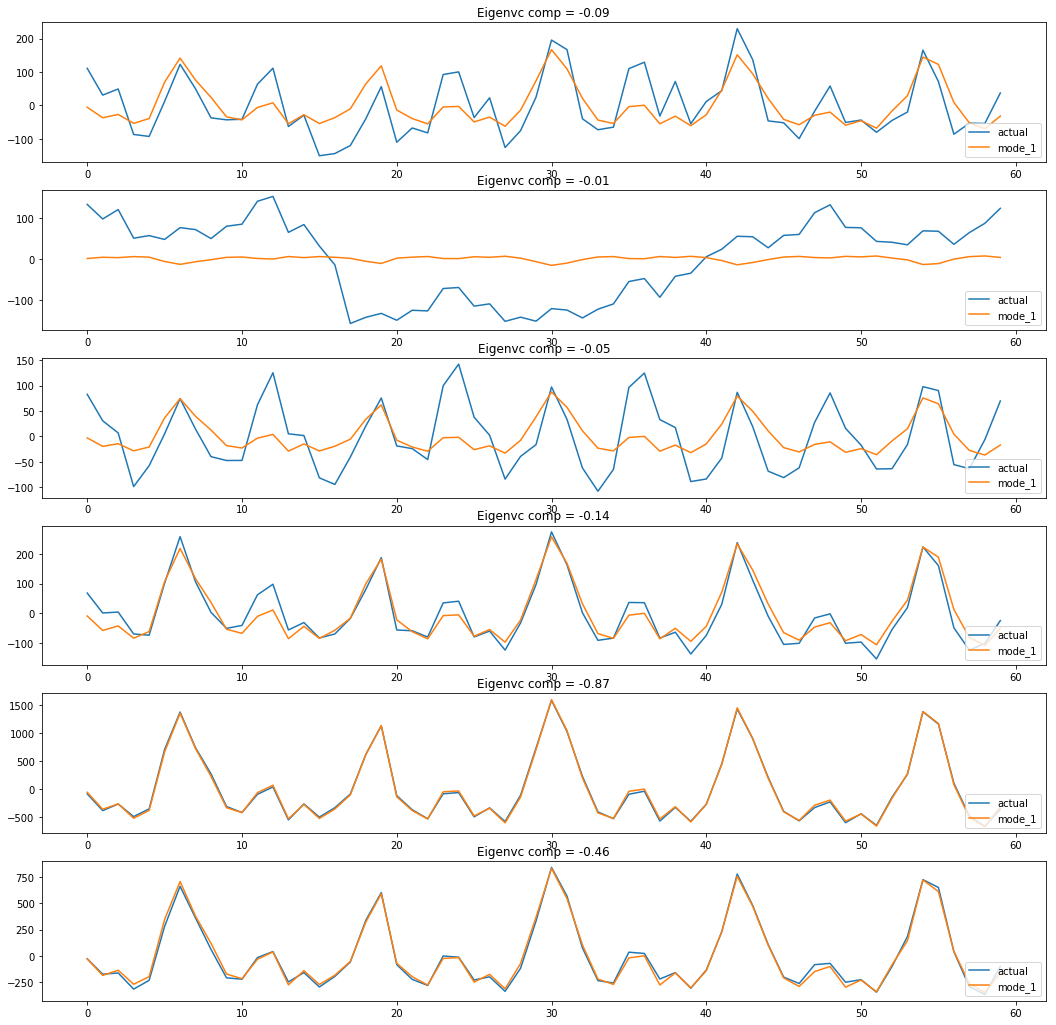

In [44]:
plt.figure(figsize=(18,18))

plt.subplot(6, 1, 1)
plt.plot(X_dm[:,0], label = 'actual')
plt.plot(x_1[:,0], label = "mode_1")
plt.legend(loc='lower right')
plt.title("Eigenvc comp = -0.09")

plt.subplot(6, 1, 2)
plt.plot(X_dm[:,1], label = 'actual')
plt.plot(x_1[:,1], label = "mode_1")
plt.legend(loc='lower right')
plt.title("Eigenvc comp = -0.01")

plt.subplot(6, 1, 3)
plt.plot(X_dm[:,2], label = 'actual')
plt.plot(x_1[:,2], label = "mode_1")
plt.legend(loc='lower right')
plt.title("Eigenvc comp = -0.05")

plt.subplot(6, 1, 4)
plt.plot(X_dm[:,3], label = 'actual')
plt.plot(x_1[:,3], label = "mode_1")
plt.legend(loc='lower right')
plt.title("Eigenvc comp = -0.14")

plt.subplot(6, 1, 5)
plt.plot(X_dm[:,4], label = 'actual')
plt.plot(x_1[:,4], label = "mode_1")
plt.legend(loc='lower right')
plt.title("Eigenvc comp = -0.87")

plt.subplot(6, 1, 6)
plt.plot(X_dm[:,5], label = 'actual')
plt.plot(x_1[:,5], label = "mode_1")
plt.legend(loc='lower right')
plt.title("Eigenvc comp = -0.46")
plt.show()

Resynthezing with just the first mode:
$\mathbf{x'}\approx\mathbf{e_1}u_1$ 

### What if we normalize? 

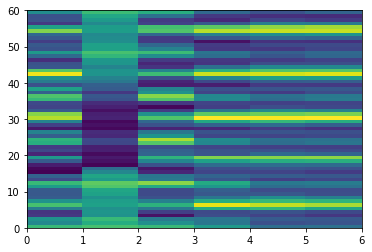

In [11]:
# Normalize around the overall zscore

# Check the temperature of each year as the summer of 2009 seems to have been mild

Xn = st.zscore(X)
plt.pcolor(Xn)

In [15]:
# Calculate the covariance matrix of the normalized loads
#Xn_dm = Xn - ones @ Xn/n           # demean the matrix
#Sn = Xn_dm.transpose() @ Xn_dm/(n-1) 

Xn_dm = Xn - np.dot(ones,Xn/n)
Sn = np.dot(Xn_dm.transpose(), Xn_dm/(n-1))
# The Covariance Matrix is
Sn
# Voila... We get something proportional to the correlation matrix

array([[ 1.01694915,  0.16476197,  0.82381628,  0.82416677,  0.69687408,
         0.74196087],
       [ 0.16476197,  1.01694915,  0.1447245 ,  0.03210815, -0.07298545,
        -0.05542213],
       [ 0.82381628,  0.1447245 ,  1.01694915,  0.69036653,  0.47742892,
         0.54594318],
       [ 0.82416677,  0.03210815,  0.69036653,  1.01694915,  0.95562979,
         0.96656977],
       [ 0.69687408, -0.07298545,  0.47742892,  0.95562979,  1.01694915,
         1.0087177 ],
       [ 0.74196087, -0.05542213,  0.54594318,  0.96656977,  1.0087177 ,
         1.01694915]])

In [17]:
e_Sn = linalg.eig(Sn)
dn = e_Sn[0]

print("Normalized Matrix. Using the Covariance matrix: \n", "EigenVectors \n",e_Sn[1], "\n Eigenvalues \n", e_Sn[0])

('Normalized Matrix. Using the Covariance matrix:\n', 'EigenVectors\n', array([[-0.44205746, -0.21628621,  0.29266238, -0.81965685, -0.01746211,
         0.00345474],
       [-0.02684077, -0.87115624, -0.48325546,  0.07208739, -0.00544006,
         0.04005436],
       [-0.37685788, -0.30397164,  0.66490495,  0.52359006, -0.08753601,
         0.20413643],
       [-0.48494585,  0.06209229, -0.12644356,  0.19366575,  0.13345819,
        -0.83046167],
       [-0.4556004 ,  0.24050176, -0.37031122,  0.06663594, -0.73228687,
         0.23826954],
       [-0.46807982,  0.20052872, -0.29256781,  0.08290197,  0.66177623,
         0.45855542]]), '\nEigenvalues\n', array([ 4.13725229,  1.13897213,  0.63696408,  0.14978257,  0.00434333,
        0.03438052]))


In [18]:
plt.plot(dn/np.sum(dn),linestyle='--', marker='o', color='b')
plt.xlabel('mode')
plt.suptitle('Fractional Variance of the Normalized Matrix')

Text(0.5,0.98,u'Fractional Variance of the Normalized Matrix')

In [20]:
e = linalg.eig(Sn)
egvl = e[0]
eigvl_1 = egvl[0]
eigvec = e[1]
e_1 = eigvec[:,0]
e_2 = eigvec[:,1]
#u = eigvec.transpose() @ xp.transpose()
#u
eigvec

array([[-0.44205746, -0.21628621,  0.29266238, -0.81965685, -0.01746211,
         0.00345474],
       [-0.02684077, -0.87115624, -0.48325546,  0.07208739, -0.00544006,
         0.04005436],
       [-0.37685788, -0.30397164,  0.66490495,  0.52359006, -0.08753601,
         0.20413643],
       [-0.48494585,  0.06209229, -0.12644356,  0.19366575,  0.13345819,
        -0.83046167],
       [-0.4556004 ,  0.24050176, -0.37031122,  0.06663594, -0.73228687,
         0.23826954],
       [-0.46807982,  0.20052872, -0.29256781,  0.08290197,  0.66177623,
         0.45855542]])

### How to treat load, wind and solar as u, v and w
Consider the solar, wind resources (radiance and wind speed) per load zone. We convert these into an energy supply per unit (turbine or solar panel). We thus have a 3 variables expressed in energy units (kWh): load, solar and wind. We can then express these as 3 variables: (l, s, w). We can use the "reshape" method...